# Change detection with SAR imagery

As seen in previous notebooks, SAR imagery have some characteristics that make it ideal for change detection:

* Weather and daytime independence
* Regular acquired time series

But also has some limitations because of noise (e.g. speckle).

There are a lot of different studies about different approaches for change detection using SAR imagery.

It is possible to study the changes by using the backscatter of a pair of images or also by having into account other inputs that use also the phase information (e.g. coherence).
The coherence is a measure of the "similarity of two SAR images" (it is the amplitude of the complex correlation coefficient).

TODO - Add example images from GEO-DAMP? (Lebanon composites, MTC, ACD...)





## Amplitude Change Detection - ACD

Look for change detection by using the changes in the amplitude/backscatter of a pair of images at different dates.
Examples: 
* new building: before low backscatter, after high backscatter
* Flooding: decrease of backscatter because of very low backscatter of water bodies
* Burned Area: depending of the vegetation characteristics, it could be are increase or decrease of backscatter

### ACD in BETTER

During the BETTER project, different pipelines where designed that can be used to detect changes with S1:

* SAR Change Detection with SLC data (SATCEN 01-02)
* SAR Change Detection with GRD data (SATCEN 02-01)
* CCD with Sentinel-1 SLC IW data (SATCEN 03-01)
* External challenge with WCO

The objectives of these pipelines are illegal mining activities monitoring, burned area analysis...

Most of the examples and datasets that are going to be used have been generated using these pipelines.

### Changes example in Amazonas - Brasil

Time series of images available in https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/ for fire monitoring.

Every geotiff file has three bands:
* Backscatter at date 1
* Backscatter at date 2
* Coherence date 1 - date 2 (will be explained later?)

In this kind of vegetation, it is possible to see a decrease of backscatter of the burned area with respect to the not burned.
In the examples, the rivers have a very low backscatter. The areas without vegetation has a lower backscatter than the vegetated ones.

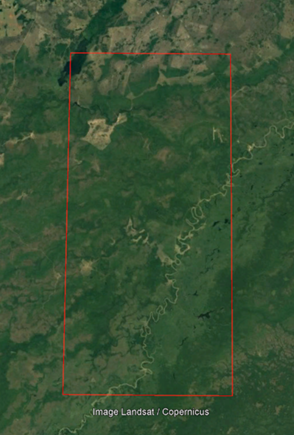

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from helpers import *

In [ ]:
s1Burned1= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif'
s1Burned2= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200715T091833_20200727T091834.tif'
s1Burned3= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif'
s1Burned4= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif'
aoi_bbox = '-56.6,-16.95,-56.4,-16.5'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
img_data1 = vsi_download(s1Burned1, aoi)
img_data3 = vsi_download(s1Burned3, aoi)
layers = []
layers.append(img_data1[:,:,0])
layers.append(img_data3[:,:,1])
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=0.5)

### Changes example in Charpiya

Time series of images available in /data for monitoring of refugee camp construction and flooding

Every geotiff file has one band.

In [ ]:
charp_data1=load_image('data/backscatterCharpiya20171220.tif')
charp_data2=load_image('data/backscatterCharpiya20180910.tif')
layers = []
layers.append(charp_data1)
layers.append(charp_data2)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=0.5)

### Changes example in Niamey

Time series of images available in /data 

Every geotiff file has one band (byte).

In [ ]:
img_data1=load_image('data/backscatterNiamey20180130.tif')
img_data2=load_image('data/backscatterNiamey20180611.tif')
img_data3=load_image('data/backscatterNiamey20180927.tif')
#testScatter(img_data1.flatten(),img_data2.flatten())
layers = []
layers.append(img_data1)
layers.append(img_data2)
layers.append(img_data3)
image = np.dstack(layers)
plot_bands_row(image)


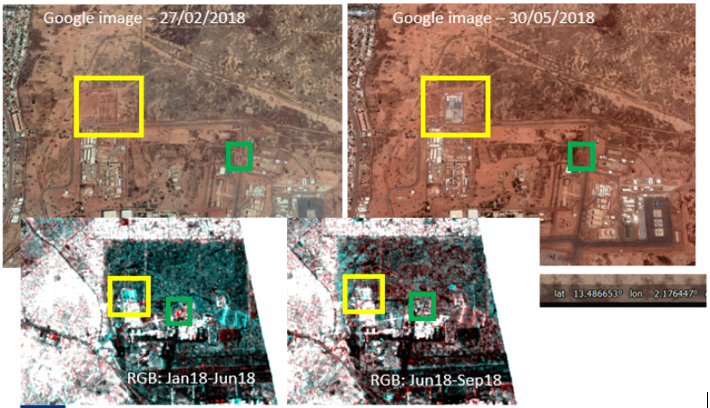

In order to see the  changes, we can visually compare the images before-after the events but it is also possible to highlight the changes with an RGB composite.

Usually it is used the following composite (known as ACD):
* R: Before backscatter
* G: After backscatter
* B: After backscatter

With this order, the colour interpretation is the following:

* Red: Backscatter decreased (e.g. destroyed building, new water bodies)
* Cyan: Backscatter increased (e.g. new building)
* Grey-scale: no changes. 
 * Black: very low backscatter before and after
 * White: very high backscatter before and after

In [ ]:
plot_rgb(img_data1,img_data2,img_data2)

## Proposed exercise: 

Generate RGB of Charpiya and Amazonas